# COREFL: Corpus of English as a Foreign Language

http://corefl.learnercorpora.com/user_guide/corpus_design

### Set up

In [1]:

#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

#lc_path = '/content/drive/MyDrive/CMLL_Project/texts.csv'
lc = pd.read_csv("texts.csv", delimiter='	')

#lc.head(2)

### Basic properties of data

In [2]:
#lc.shape

In [3]:
#lc.describe()

In [4]:
#lc.isna().sum()

In [5]:
#lc.nunique()

### Numeric feature distributions

In [6]:
#lc['Year data collection'].value_counts().sort_index().plot.bar()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.histplot(lc['Placement test score (%)'], kde=True, bins=20)
#plt.show()

In [8]:
#sns.histplot(lc['Age'], kde=True, bins=20)
#plt.show()

In [9]:
#sns.histplot(lc['Age of exposure to English'], kde=True, bins=20)
#plt.show()

In [10]:
#sns.histplot(lc['Years studying English'], kde=True, bins=20)
#plt.show()

In [11]:
#sns.histplot(lc['Stay abroad (months)'] , kde=True, bins=100)
#plt.show()

In [12]:
#sns.histplot(lc[lc['Stay abroad (months)'] != 0]['Stay abroad (months)'] , kde=True, bins=100)
#plt.show()

In [13]:
#lc['Stay abroad (months)'].value_counts().sort_index()

In [14]:
#sns.histplot(lc['Minutes taken to complete the task'] , kde=True, bins=200)
#plt.show()


In [15]:
#lc['Minutes taken to complete the task'].value_counts().sort_index().plot.bar(figsize=(15, 3))

### Categorical feature distributions

In [16]:
#lc['Sex'].value_counts().plot.bar()

In [17]:
#lc['Task number'].value_counts().sort_index().plot.bar()

### Extract features from text

Nikita's part

In [18]:
dataset_raw = lc
dataset_raw = dataset_raw.drop(columns=['Placement test score (raw)','Filename', 'Year data collection', 'Sex', 'School/University/Institution', 'Major', 'Stay abroad (where)', 'Stay abroad (when)', 
                           'Proficiency (self-assessment) speaking', 'Proficiency (self-assessment) listening', 'Proficiency (self-assessment) reading',
                            'Proficiency (self-assessment) in additional language speaking', 'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading', 'Proficiency (self-assessment) in additional language writing',
       'Medium', 'Writing/audio details', 'Minutes taken to complete the task', 'Where the task was done', 'Resources used', 'Original text', 'Additional foreign language(s)',
       "Father's native language", "Mother's native language", 'Proficiency (self-assessment)', 'Proficiency (self-assessment)', 'Year at university/school', 'Language certificates (type and level)'])

#Let us check the number of nan values in each column
print(dataset_raw.isna().sum())

Subcorpus                                                0
Placement test score (%)                                 0
Proficiency                                              0
Age                                                      1
L1                                                       0
Languages spoken at home                                 0
Age of exposure to English                               1
Years studying English                                  19
Stay abroad in English speaking country (>= 1 month)     0
Stay abroad (months)                                    26
Proficiency (self-assessment) writing                    9
Task number                                              0
Task title                                               0
Text                                                     0
dtype: int64


In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Defining columns with missing values
columns_with_missing_values = ['Stay abroad (months)', 'Years studying English', 'Age', 'Age of exposure to English']

dataset_raw_imputed = dataset_raw.copy()
categorical_columns = dataset_raw_imputed[columns_with_missing_values].select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_data = encoder.fit_transform(dataset_raw_imputed[categorical_columns])

dataset_imputed = dataset_raw_imputed.drop(columns=categorical_columns)
dataset_imputed = pd.concat([dataset_imputed, pd.DataFrame(encoded_categorical_data)], axis=1)

# Initializing the K-NN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Applying K-NN imputation for all columns with missing values
dataset_imputed[columns_with_missing_values] = knn_imputer.fit_transform(dataset_imputed[columns_with_missing_values])
print("done")

done


In [20]:
#### First let us define function that returns tokenized sentences and lemmatized words from the corresponding sentences
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

#Defining function to: 1) tokenize sentences, 2) lemmatize words in sentences
def tokenize_and_lemmatize(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    
    # Tokenize words and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    lemmatized_words = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_words.extend([lemmatizer.lemmatize(word) for word in words])
        tokenized_sentences.append(words)
    
    return tokenized_sentences, lemmatized_words
print("done")

done


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michelle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Michelle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# dataset_imputed[['Tokenized Sentences', 'Lemmatized Words']] = dataset_imputed['Text'].apply(lambda x: tokenize_and_lemmatize(x))
nltk.download('omw-1.4')

tokenized_and_lemmatized = dataset_imputed['Text'].apply(lambda x: tokenize_and_lemmatize(x))
dataset_imputed[['Tokenized Sentences', 'Lemmatized Words']] = tokenized_and_lemmatized.apply(pd.Series)
print("done")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Michelle\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


done


In [22]:
dataset_imputed

,Subcorpus,Placement test score (%),Proficiency,Age,L1,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad in English speaking country (>= 1 month),Stay abroad (months),Proficiency (self-assessment) writing,Task number,Task title,Text,Tokenized Sentences,Lemmatized Words
0,Learners,50.0,B1 (lower intermediate),26.0,German,German,8.0,13.0,No,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in a forest and bro...,"[[One, day, Tommy, found, a, frog, in, a, fore...","[One, day, Tommy, found, a, frog, in, a, fores..."
1,Learners,50.0,B1 (lower intermediate),26.0,German,German,8.0,13.0,No,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in the Forest. He b...,"[[One, day, Tommy, found, a, frog, in, the, Fo...","[One, day, Tommy, found, a, frog, in, the, For..."
2,Learners,61.7,B1 (lower intermediate),19.0,German,German,10.0,11.0,No,0.0,A2 (upper beginner),13,13. Frog,One day a little boy called John uh with his d...,"[[One, day, a, little, boy, called, John, uh, ...","[One, day, a, little, boy, called, John, uh, w..."
3,Learners,61.7,B1 (lower intermediate),19.0,German,German,10.0,11.0,No,0.0,A2 (upper beginner),13,13. Frog,"One day, there was a boy called John who wante...","[[One, day, ,, there, was, a, boy, called, Joh...","[One, day, ,, there, wa, a, boy, called, John,..."
4,Learners,61.7,B1 (lower intermediate),21.0,German,German,9.0,12.0,No,0.0,B2 (upper intermediate),13,13. Frog,One day a boy was sitting in his room / uh he ...,"[[One, day, a, boy, was, sitting, in, his, roo...","[One, day, a, boy, wa, sitting, in, his, room,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,Learners,100.0,C2 (upper advanced),19.0,Spanish,Spanish,4.0,15.0,Yes,3.0,C1 (lower advanced),14,14. Chaplin,Charles Chaplin is walking down the street whe...,"[[Charles, Chaplin, is, walking, down, the, st...","[Charles, Chaplin, is, walking, down, the, str..."
1806,Learners,100.0,C2 (upper advanced),19.0,Spanish,Spanish,4.0,15.0,Yes,3.0,C1 (lower advanced),14,14. Chaplin,Charles Chaplin is walking down a narrow and d...,"[[Charles, Chaplin, is, walking, down, a, narr...","[Charles, Chaplin, is, walking, down, a, narro..."
1807,Learners,100.0,C2 (upper advanced),24.0,Spanish,Spanish,3.0,18.0,Yes,11.0,C2 (upper advanced),14,14. Chaplin,hhh uh from from from the distance / comes a m...,"[[hhh, uh, from, from, from, the, distance, /,...","[hhh, uh, from, from, from, the, distance, /, ..."
1808,Learners,100.0,C2 (upper advanced),24.0,Spanish,Spanish,3.0,18.0,Yes,11.0,C2 (upper advanced),14,14. Chaplin,"From afar comes a man, actually, he is Charles...","[[From, afar, comes, a, man, ,, actually, ,, h...","[From, afar, come, a, man, ,, actually, ,, he,..."


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(dataframe, categorical_columns):
    dataframe_encoded = dataframe.copy()
    
    categorical_data = dataframe_encoded[categorical_columns]
    
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    encoded_categorical_data = encoder.fit_transform(categorical_data)
    
    feature_names = encoder.get_feature_names_out(categorical_columns)
    
    encoded_dataframe = pd.DataFrame(encoded_categorical_data, columns=feature_names)
    

    dataframe_encoded.drop(categorical_columns, axis=1, inplace=True)
    
    dataframe_encoded = pd.concat([dataframe_encoded, encoded_dataframe], axis=1)
    
    return dataframe_encoded

dataframe_encoded = encode_categorical_columns(dataset_imputed, ['L1', 'Stay abroad in English speaking country (>= 1 month)'])
print("done")

done


In [24]:
dataframe_encoded#.drop(columns= ['Subcorpus', 'Proficiency (self-assessment) writing', 'Task number', 'Task title', 'Text'])

,Subcorpus,Placement test score (%),Proficiency,Age,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad (months),Proficiency (self-assessment) writing,Task number,Task title,Text,Tokenized Sentences,Lemmatized Words,L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes
0,Learners,50.0,B1 (lower intermediate),26.0,German,8.0,13.0,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in a forest and bro...,"[[One, day, Tommy, found, a, frog, in, a, fore...","[One, day, Tommy, found, a, frog, in, a, fores...",0.0,0.0
1,Learners,50.0,B1 (lower intermediate),26.0,German,8.0,13.0,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in the Forest. He b...,"[[One, day, Tommy, found, a, frog, in, the, Fo...","[One, day, Tommy, found, a, frog, in, the, For...",0.0,0.0
2,Learners,61.7,B1 (lower intermediate),19.0,German,10.0,11.0,0.0,A2 (upper beginner),13,13. Frog,One day a little boy called John uh with his d...,"[[One, day, a, little, boy, called, John, uh, ...","[One, day, a, little, boy, called, John, uh, w...",0.0,0.0
3,Learners,61.7,B1 (lower intermediate),19.0,German,10.0,11.0,0.0,A2 (upper beginner),13,13. Frog,"One day, there was a boy called John who wante...","[[One, day, ,, there, was, a, boy, called, Joh...","[One, day, ,, there, wa, a, boy, called, John,...",0.0,0.0
4,Learners,61.7,B1 (lower intermediate),21.0,German,9.0,12.0,0.0,B2 (upper intermediate),13,13. Frog,One day a boy was sitting in his room / uh he ...,"[[One, day, a, boy, was, sitting, in, his, roo...","[One, day, a, boy, wa, sitting, in, his, room,...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,Learners,100.0,C2 (upper advanced),19.0,Spanish,4.0,15.0,3.0,C1 (lower advanced),14,14. Chaplin,Charles Chaplin is walking down the street whe...,"[[Charles, Chaplin, is, walking, down, the, st...","[Charles, Chaplin, is, walking, down, the, str...",1.0,1.0
1806,Learners,100.0,C2 (upper advanced),19.0,Spanish,4.0,15.0,3.0,C1 (lower advanced),14,14. Chaplin,Charles Chaplin is walking down a narrow and d...,"[[Charles, Chaplin, is, walking, down, a, narr...","[Charles, Chaplin, is, walking, down, a, narro...",1.0,1.0
1807,Learners,100.0,C2 (upper advanced),24.0,Spanish,3.0,18.0,11.0,C2 (upper advanced),14,14. Chaplin,hhh uh from from from the distance / comes a m...,"[[hhh, uh, from, from, from, the, distance, /,...","[hhh, uh, from, from, from, the, distance, /, ...",1.0,1.0
1808,Learners,100.0,C2 (upper advanced),24.0,Spanish,3.0,18.0,11.0,C2 (upper advanced),14,14. Chaplin,"From afar comes a man, actually, he is Charles...","[[From, afar, comes, a, man, ,, actually, ,, h...","[From, afar, come, a, man, ,, actually, ,, he,...",1.0,1.0


In [25]:
import nltk
nltk.download('punkt')

lc = dataframe_encoded

lc['tokenized_text'] = lc['Text'].apply(nltk.word_tokenize)

print(lc['tokenized_text'].head())


lc.columns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michelle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [One, day, Tommy, found, a, frog, in, a, fores...
1    [One, day, Tommy, found, a, frog, in, the, For...
2    [One, day, a, little, boy, called, John, uh, w...
3    [One, day, ,, there, was, a, boy, called, John...
4    [One, day, a, boy, was, sitting, in, his, room...
Name: tokenized_text, dtype: object


Index(['Subcorpus', 'Placement test score (%)', 'Proficiency', 'Age',
       'Languages spoken at home', 'Age of exposure to English',
       'Years studying English', 'Stay abroad (months)',
       'Proficiency (self-assessment) writing', 'Task number', 'Task title',
       'Text', 'Tokenized Sentences', 'Lemmatized Words', 'L1_Spanish',
       'Stay abroad in English speaking country (>= 1 month)_Yes',
       'tokenized_text'],
      dtype='object')

From poki code

In [26]:
# Number of unique words: The count of distinct words in each poem
lc['unique_word_count'] = lc['Lemmatized Words'].apply(lambda x: len(set(x)))

# Lexical diversity (Type-Token Ratio): Ratio of unique words to total words in a poem
lc['lexical_diversity'] = lc['unique_word_count'] / lc['Lemmatized Words'].str.len()

# Sentence count: The number of sentences in each poem.
from nltk.tokenize import sent_tokenize
lc['sentence_count'] = lc['Text'].apply(lambda x: len(sent_tokenize(x)))

# Average words per sentence: Total words divided by the number of sentences.
lc['avg_words_per_sentence'] = lc['tokenized_text'].str.len() / lc['sentence_count']

# Punctuation count: Count of punctuation marks (commas, periods, etc.) in each poem.
import string
lc['punctuation_count'] = lc['Text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# Gunning Fog Index: Another readability measure based on sentence and word complexity
!pip install textstat
import textstat
from textstat import gunning_fog
lc['gunning_fog_index'] = lc['Text'].apply(lambda x: gunning_fog(x))

from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')

# POS (Part of Speech) Features:
def pos_distribution(tokens):
    tags = nltk.pos_tag(tokens)
    tag_freq = FreqDist(tag for word, tag in tags)
    return tag_freq

lc['pos_distribution'] = lc['tokenized_text'].apply(pos_distribution)


print("done")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Michelle\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


done


In [27]:
#text_features = lc[['unique_word_count', 'lexical_diversity','sentence_count','avg_words_per_sentence', 'punctuation_count', 'gunning_fog_index', 'pos_distribution']]
#text_features.head()

In [28]:
#text_features.describe()

In [29]:
# Dropping the columns we do not need anymore (including pos tags), so it is usable for the machine learning algorithms

workable_data = lc.drop(columns= ['Subcorpus', 'Languages spoken at home', 'Proficiency (self-assessment) writing', 'Task number', 'Task title', 'Text', 'Tokenized Sentences', 'Lemmatized Words', 'tokenized_text', 'pos_distribution', 'Placement test score (%)'])
workable_data

,Proficiency,Age,Age of exposure to English,Years studying English,Stay abroad (months),L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
0,B1 (lower intermediate),26.0,8.0,13.0,0.0,0.0,0.0,65,0.524194,1,124.000000,5,48.33
1,B1 (lower intermediate),26.0,8.0,13.0,0.0,0.0,0.0,66,0.481752,10,13.700000,15,4.88
2,B1 (lower intermediate),19.0,10.0,11.0,0.0,0.0,0.0,80,0.512821,1,156.000000,8,60.41
3,B1 (lower intermediate),19.0,10.0,11.0,0.0,0.0,0.0,82,0.554054,12,12.333333,17,5.28
4,B1 (lower intermediate),21.0,9.0,12.0,0.0,0.0,0.0,101,0.476415,1,212.000000,20,80.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,C2 (upper advanced),19.0,4.0,15.0,3.0,1.0,1.0,85,0.408654,1,208.000000,22,75.05
1806,C2 (upper advanced),19.0,4.0,15.0,3.0,1.0,1.0,71,0.572581,7,17.714286,12,7.83
1807,C2 (upper advanced),24.0,3.0,18.0,11.0,1.0,1.0,163,0.229577,1,710.000000,115,244.33
1808,C2 (upper advanced),24.0,3.0,18.0,11.0,1.0,1.0,233,0.373397,30,20.800000,71,7.04


In [30]:
from sklearn.preprocessing import LabelEncoder

# encoding the proficiency column, so we can use it as a target variable
label_encoder = LabelEncoder()
workable_data['Proficiency'] = label_encoder.fit_transform(workable_data['Proficiency'])

# scaling of the data is not necessary, because the used algorithms are not sensitive to that

workable_data

,Proficiency,Age,Age of exposure to English,Years studying English,Stay abroad (months),L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
0,2,26.0,8.0,13.0,0.0,0.0,0.0,65,0.524194,1,124.000000,5,48.33
1,2,26.0,8.0,13.0,0.0,0.0,0.0,66,0.481752,10,13.700000,15,4.88
2,2,19.0,10.0,11.0,0.0,0.0,0.0,80,0.512821,1,156.000000,8,60.41
3,2,19.0,10.0,11.0,0.0,0.0,0.0,82,0.554054,12,12.333333,17,5.28
4,2,21.0,9.0,12.0,0.0,0.0,0.0,101,0.476415,1,212.000000,20,80.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,5,19.0,4.0,15.0,3.0,1.0,1.0,85,0.408654,1,208.000000,22,75.05
1806,5,19.0,4.0,15.0,3.0,1.0,1.0,71,0.572581,7,17.714286,12,7.83
1807,5,24.0,3.0,18.0,11.0,1.0,1.0,163,0.229577,1,710.000000,115,244.33
1808,5,24.0,3.0,18.0,11.0,1.0,1.0,233,0.373397,30,20.800000,71,7.04


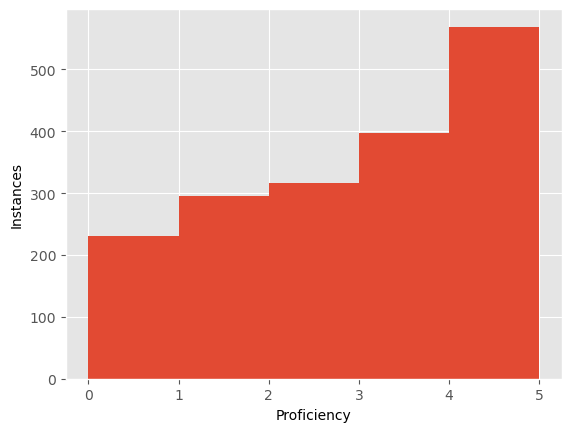

In [31]:
# Getting X and y
X = workable_data.drop('Proficiency', axis=1)
y = workable_data['Proficiency']

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the target variable Proficiency
plt.style.use("ggplot")
plt.hist(x=y, bins=5)
plt.xlabel("Proficiency")
plt.ylabel("Instances")
plt.show()

In [40]:
# Looking at the algorithm DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Dividing the data in a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)


# Defining the algorithm
tree = DecisionTreeClassifier(random_state=0)
param_grid_tree = {"max_depth": [4, 6, 8]}


grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)


print("Results for the model Decision Tree: \n")
print("Best parameter: {}".format(grid_search_tree.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_tree.best_score_))
print("done")

Results for the model Decision Tree: 

Best parameter: {'max_depth': 6}
Best cross_validation score: 0.41
done


In [41]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Results for the model Decision Tree: \n ")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_tree.score(X_train, y_train)))
print("Accuracy on test set: {}".format(grid_search_tree.score(X_test, y_test)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/f1-score
pred_grid_search_train = grid_search_tree.predict(X_train)
pred_grid_search_test = grid_search_tree.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train, pred_grid_search_train)
confusion_test = confusion_matrix(y_test, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model Decision Tree: 
 
Accuracy on train set: 0.5297728667894414
Accuracy on test set: 0.39226519337016574
--------------------------------
precision on train set: 0.59
precision on test set: 0.41
--------------------------------
recall on train set: 0.51
recall on test set: 0.36
--------------------------------
f1-score on train set: 0.53
f1-score on test set: 0.36
--------------------------------
Confusion matrix on train set: 
[[122  38  23  22   0   1]
 [ 26 160  30  47   0   0]
 [  5  40  78 142  14   3]
 [  0   9  15 247  80  11]
 [  0   2   8 118 193  19]
 [  0   0   1  24  88  63]]
--------------------------------
Confusion matrix on test set: 
[[11  7  4  3  0  0]
 [ 2 12  7 10  1  0]
 [ 0  8  5 21  0  1]
 [ 0  3  2 19  9  3]
 [ 0  0  2 11 23  3]
 [ 0  1  0  2 10  1]]


In [34]:
!pip install xgboost
import xgboost as xgb
print("done")

done


In [42]:
# Looking at the xgboost algorithm 

xgboost = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)
param_grid_xgboost = {"objective": ["multi:softmax"], "max_depth": [4], "learning_rate": [0.1], "n_estimators": [20], "subsample": [0.6]}
# The above parameters were the best for GridSearchCV. Just kept the best ones to make the notebook run faster

grid_search_xgboost = GridSearchCV(xgboost, param_grid_xgboost, cv=5)
grid_search_xgboost.fit(X_train, y_train)


print("Results for the model xgboost: \n")
print("Best parameter: {}".format(grid_search_xgboost.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_xgboost.best_score_))

Results for the model xgboost: 

Best parameter: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20, 'objective': 'multi:softmax', 'subsample': 0.6}
Best cross_validation score: 0.45


In [43]:
print("Results for the model xgboost: \n")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_xgboost.score(X_train, y_train)))
print("Accuracy on test set: {}".format(grid_search_xgboost.score(X_test, y_test)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/recall
pred_grid_search_train = grid_search_xgboost.predict(X_train)
pred_grid_search_test = grid_search_xgboost.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")
  
# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")    
    
# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train, pred_grid_search_train)
confusion_test = confusion_matrix(y_test, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model xgboost: 

Accuracy on train set: 0.6083486801718846
Accuracy on test set: 0.4861878453038674
--------------------------------
precision on train set: 0.66
precision on test set: 0.53
--------------------------------
recall on train set: 0.60
recall on test set: 0.47
--------------------------------
f1-score on train set: 0.62
f1-score on test set: 0.48
--------------------------------
Confusion matrix on train set: 
[[145  26  14  20   1   0]
 [ 27 178  25  32   1   0]
 [ 10  44 112 100  12   4]
 [  0   7  18 249  81   7]
 [  1   0  11  94 218  16]
 [  0   0   3  20  64  89]]
--------------------------------
Confusion matrix on test set: 
[[15  5  3  2  0  0]
 [ 4 12  5 10  1  0]
 [ 0  8 13 13  0  1]
 [ 1  3  2 20 10  0]
 [ 0  1  0 12 24  2]
 [ 0  0  0  3  7  4]]


Text(0.5, 0, 'Feature importance')

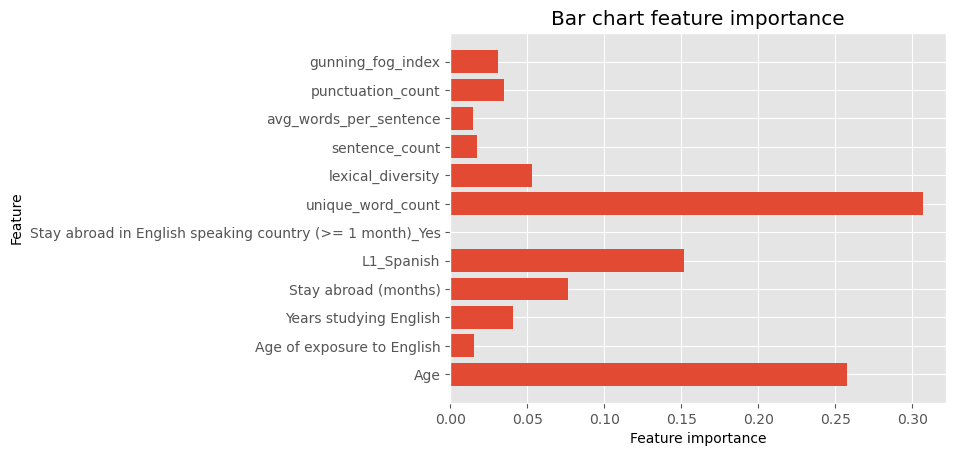

In [46]:
#Using the best parameters I found in GridSearchCV 
#and fitting the classifiers to show the feature importances
import numpy as np
xgboost_best_parameter = xgb.XGBClassifier(objective='multi:softmax', max_depth=4, learning_rate=0.1, n_estimators=20, subsample=0.6)
xgboost_best_parameter.fit(X_train, y_train)


#Making the function
def plot_feature_importances(classifier):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), classifier.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.title("Bar chart feature importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

#Making the bar plots
plot_feature_importances(tree_best_parameter)
plt.xlabel("Feature importance")